In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Minsk2020_ALS_dataset.csv")
df.head()

,ID,Sex,Age,J1_a,J3_a,J5_a,J55_a,S1_a,S3_a,S5_a,...,dCCi(7),dCCi(8),dCCi(9),dCCi(10),dCCi(11),dCCi(12),d_1,F2_i,F2_{conv},Diagnosis (ALS)
0,8,M,58,0.321817,0.141230,0.199128,0.923634,6.044559,3.196477,3.770575,...,-0.024467,-0.005300,0.051874,-0.037710,-0.026549,-0.021149,4.825476,2526.285657,833.498083,1
1,20,F,57,0.344026,0.177032,0.206458,0.827714,1.967728,0.856639,1.179851,...,0.002485,-0.004535,-0.000225,-0.006977,-0.012510,0.014773,5.729322,1985.712014,561.802625,1
2,21,F,58,0.264740,0.148228,0.177078,0.532566,1.850893,0.942743,1.071950,...,-0.013927,0.007908,0.007960,-0.009022,-0.012488,-0.015588,8.258488,2364.695972,796.723440,1
3,22,F,70,0.455793,0.174870,0.243660,0.962641,2.883768,1.284926,1.915058,...,-0.019285,-0.021768,0.020495,0.035976,-0.034648,0.008021,5.447137,1860.172768,359.409974,1
4,24,M,66,0.269335,0.143961,0.167465,0.547745,2.327924,1.164109,1.420891,...,-0.005743,0.004726,-0.015247,0.003900,-0.007686,-0.003784,8.562517,2051.627447,817.111847,1


DATA UNDERSTANDING


In [3]:
#To see how many rows and columns present in our dataset
df.shape

(64, 135)

In [4]:
# It disaply last five rows in our dataset
df.tail()

,ID,Sex,Age,J1_a,J3_a,J5_a,J55_a,S1_a,S3_a,S5_a,...,dCCi(7),dCCi(8),dCCi(9),dCCi(10),dCCi(11),dCCi(12),d_1,F2_i,F2_{conv},Diagnosis (ALS)
59,123,M,43,0.255799,0.123679,0.182658,0.505591,6.222031,2.876602,3.894294,...,0.220533,0.089766,-0.120838,-0.004221,-0.013165,0.004642,9.855665,3128.341308,1990.937097,0
60,125,M,63,0.513175,0.296489,0.334845,0.729804,9.686563,4.327943,5.687977,...,0.028016,-0.038739,0.011588,-0.011281,-0.004294,0.011239,11.094558,1964.218942,601.076046,0
61,127,F,67,0.383901,0.245923,0.251359,0.415136,4.148414,2.069757,2.527213,...,0.011685,0.007883,-0.014839,0.013859,0.011145,0.001418,12.564742,2526.285657,934.343638,0
62,129,F,68,1.336216,0.815757,0.733197,0.981928,11.224542,5.295879,6.994751,...,0.015712,0.013437,0.025113,0.008852,-0.010132,-0.008458,10.670669,3201.250289,2284.051658,0
63,131,F,60,0.916706,0.566121,0.512857,1.467165,6.372832,3.251168,3.539229,...,-0.046235,0.041946,-0.065313,-0.016682,0.061026,-0.005883,6.972152,2792.655884,1518.529172,0


In [5]:
# It show which datatype for each column in our dataset
df.dtypes

ID                   int64
Sex                 object
Age                  int64
J1_a               float64
J3_a               float64
                    ...   
dCCi(12)           float64
d_1                float64
F2_i               float64
F2_{conv}          float64
Diagnosis (ALS)      int64
Length: 135, dtype: object

In [6]:
# It show descriptive stats for all the numerical columns in our dataset
df.describe()

,ID,Age,J1_a,J3_a,J5_a,J55_a,S1_a,S3_a,S5_a,S11_a,...,dCCi(7),dCCi(8),dCCi(9),dCCi(10),dCCi(11),dCCi(12),d_1,F2_i,F2_{conv},Diagnosis (ALS)
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,67.875000,56.390625,0.658951,0.379242,0.395886,0.945496,5.072071,2.617924,3.078959,4.393513,...,0.003393,0.006224,-0.002889,-0.002152,-0.001969,0.001269,9.164473,2495.116475,1209.976405,0.484375
std,37.358198,10.203668,0.724002,0.435636,0.431926,0.791558,4.087221,2.289347,2.568471,3.327968,...,0.033268,0.024670,0.028315,0.019542,0.018012,0.020800,2.681449,617.755856,553.694046,0.503706
min,2.000000,34.000000,0.098881,0.065791,0.092655,0.285497,0.883453,0.449099,0.497111,0.804179,...,-0.052002,-0.069202,-0.120838,-0.065735,-0.042955,-0.083977,2.276702,444.730268,48.246203,0.000000
25%,31.750000,50.750000,0.325932,0.172422,0.198274,0.538387,2.641830,1.369446,1.508064,2.123761,...,-0.008234,-0.004222,-0.009654,-0.009853,-0.012674,-0.006534,7.604734,2051.627447,800.181156,0.000000
50%,66.500000,58.000000,0.458935,0.253976,0.293405,0.698183,4.198486,1.966045,2.653666,3.634994,...,0.000775,0.006272,-0.000937,-0.001614,-0.003921,0.000661,9.646564,2471.097222,1206.596083,0.000000
75%,98.250000,63.250000,0.772783,0.465699,0.476541,1.189025,6.259731,3.258184,3.801504,5.644808,...,0.011561,0.019092,0.006745,0.008349,0.005578,0.009515,10.757522,2938.236560,1551.677678,1.000000
max,131.000000,80.000000,5.391649,3.217293,3.321567,5.991336,29.441589,16.791944,18.368778,20.750202,...,0.220533,0.089766,0.080337,0.057303,0.061026,0.077897,15.420777,3599.554394,2441.219054,1.000000


Data Preparation

Identifying if any duplicates present in our dataset

In [7]:
df.duplicated().sum()

0

In [8]:
df.iloc[:,-1].value_counts()

Diagnosis (ALS)
0    33
1    31
Name: count, dtype: int64

In [9]:
df.isnull().sum()

ID                 0
Sex                0
Age                0
J1_a               0
J3_a               0
                  ..
dCCi(12)           0
d_1                0
F2_i               0
F2_{conv}          0
Diagnosis (ALS)    0
Length: 135, dtype: int64

In [10]:
print(df["Age"].min())
print(df["Age"].max())

34
80


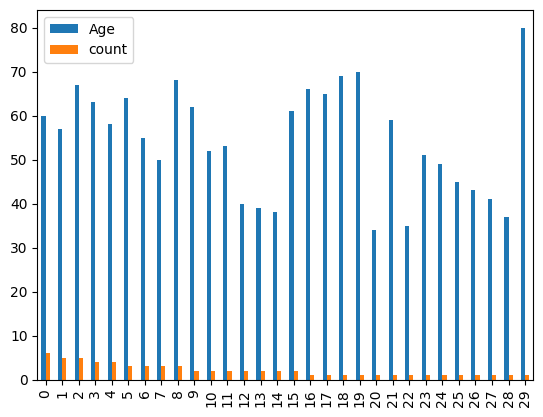

In [11]:
df_age=df[["Age"]].value_counts().reset_index().plot(kind="bar")

<Axes: ylabel='Frequency'>

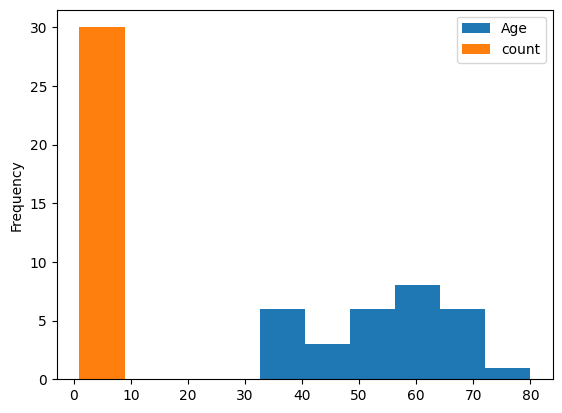

In [12]:
df["Age"].value_counts().reset_index().plot(kind="hist")

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()
le.fit(["M","F"])
df["Sex"]=le.transform(df["Sex"])

In [15]:
x=df.iloc[:,:-1]
x.head()

,ID,Sex,Age,J1_a,J3_a,J5_a,J55_a,S1_a,S3_a,S5_a,...,dCCi(6),dCCi(7),dCCi(8),dCCi(9),dCCi(10),dCCi(11),dCCi(12),d_1,F2_i,F2_{conv}
0,8,1,58,0.321817,0.141230,0.199128,0.923634,6.044559,3.196477,3.770575,...,0.016809,-0.024467,-0.005300,0.051874,-0.037710,-0.026549,-0.021149,4.825476,2526.285657,833.498083
1,20,0,57,0.344026,0.177032,0.206458,0.827714,1.967728,0.856639,1.179851,...,0.019235,0.002485,-0.004535,-0.000225,-0.006977,-0.012510,0.014773,5.729322,1985.712014,561.802625
2,21,0,58,0.264740,0.148228,0.177078,0.532566,1.850893,0.942743,1.071950,...,0.007199,-0.013927,0.007908,0.007960,-0.009022,-0.012488,-0.015588,8.258488,2364.695972,796.723440
3,22,0,70,0.455793,0.174870,0.243660,0.962641,2.883768,1.284926,1.915058,...,0.013213,-0.019285,-0.021768,0.020495,0.035976,-0.034648,0.008021,5.447137,1860.172768,359.409974
4,24,1,66,0.269335,0.143961,0.167465,0.547745,2.327924,1.164109,1.420891,...,0.002948,-0.005743,0.004726,-0.015247,0.003900,-0.007686,-0.003784,8.562517,2051.627447,817.111847


In [16]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis (ALS), dtype: int64

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [18]:
best_classif=SelectKBest(score_func=f_classif,k=10)
k_best=best_classif.fit(x,y)
# for summarize score
np.set_printoptions(precision=3)
print(k_best.scores_)

[6.303e+00 1.520e+00 4.811e+00 3.724e+00 2.809e+00 3.903e+00 9.294e+00
 2.780e+00 2.011e+00 3.040e+00 4.534e+00 2.831e+00 1.787e-01 8.440e+00
 1.312e+01 1.347e+01 5.066e+00 7.267e+00 2.376e+00 1.412e-02 6.772e-01
 1.763e-01 8.742e-01 1.352e+00 3.328e+00 7.109e+00 7.825e+00 2.331e+00
 2.941e+00 8.338e-01 5.357e+00 1.230e+00 4.303e+00 7.717e+00 4.655e+00
 5.472e+00 1.129e+00 1.796e-01 3.097e+00 1.057e-01 2.300e+00 1.051e+01
 6.420e+00 1.976e+00 1.873e+00 2.353e-01 1.112e-01 1.987e+00 6.264e+00
 1.211e+00 3.345e+00 3.326e-01 2.591e+00 4.131e+00 2.179e-02 9.890e-03
 2.847e-02 1.315e+00 2.494e+00 3.050e+00 6.995e-05 9.790e-01 3.497e-01
 2.174e+00 1.669e-01 6.167e-01 1.156e+00 3.623e-01 6.456e-02 7.822e-01
 4.080e+00 3.851e+00 3.012e+00 3.970e+00 6.623e+00 4.341e+00 1.953e+00
 1.999e+00 2.240e+00 8.703e+00 9.584e+00 1.780e+00 5.373e+00 1.110e+00
 2.576e+00 2.050e+00 4.365e+00 4.961e+00 5.556e-01 7.112e-02 1.869e-01
 2.218e-01 5.263e+00 7.710e-01 1.488e-01 1.671e-01 5.487e+00 4.335e+00
 7.534

In [19]:
best_features=(k_best.get_feature_names_out())
best_features

array(['J55_a', 'PPE_a', 'PVI_a', 'Ha(7)_{rel}', 'PVI_i', 'HNR_i',
       'CCi(2)', 'CCi(6)', 'd_1', 'F2_{conv}'], dtype=object)

In [20]:
features=df[["Age","Sex",'J55_a', 'PPE_a', 'PVI_a', 'Ha(7)_{rel}', 'PVI_i', 'HNR_i',
       'CCi(2)', 'CCi(6)', 'd_1', 'F2_{conv}']]

In [21]:
target=df.iloc[:,-1]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis (ALS), dtype: int64

In [22]:
list(enumerate(features))

[(0, 'Age'),
 (1, 'Sex'),
 (2, 'J55_a'),
 (3, 'PPE_a'),
 (4, 'PVI_a'),
 (5, 'Ha(7)_{rel}'),
 (6, 'PVI_i'),
 (7, 'HNR_i'),
 (8, 'CCi(2)'),
 (9, 'CCi(6)'),
 (10, 'd_1'),
 (11, 'F2_{conv}')]

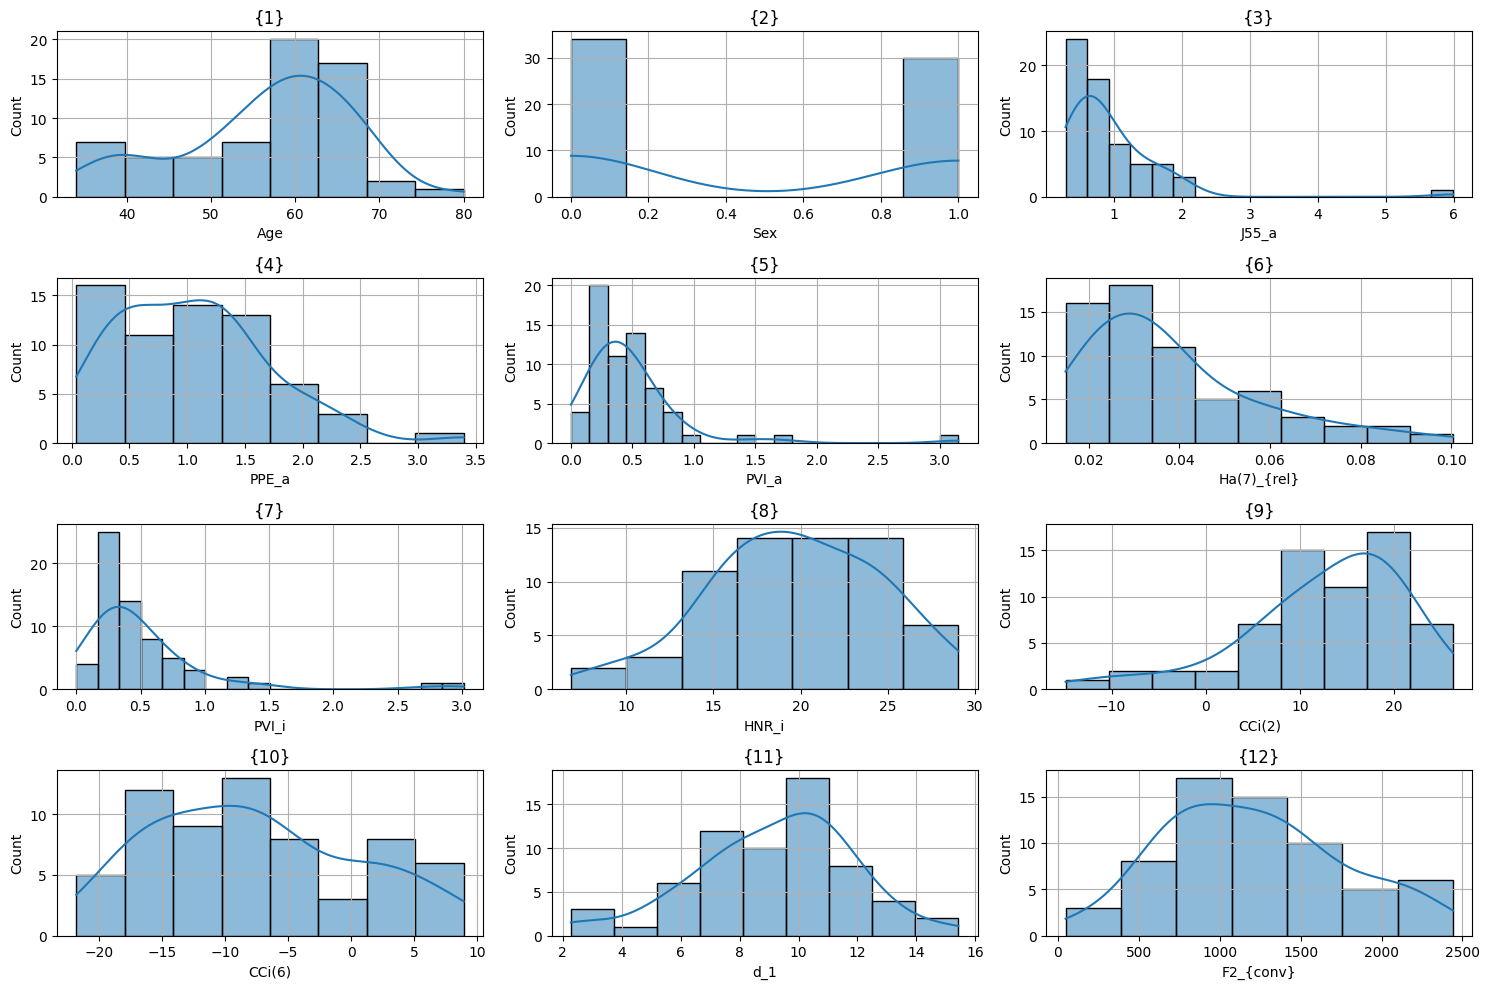

In [23]:
fig, axes = plt.subplots(4,3 ,figsize=(15, 10))
axes = axes.flatten()
for i, ax in enumerate(axes):
    sns.histplot(features.iloc[:,i], ax=ax, kde=True)
    ax.set_title({i+1})
    ax.grid(True)
    plt.tight_layout()

In [24]:
corr=features.corr()
corr

,Age,Sex,J55_a,PPE_a,PVI_a,Ha(7)_{rel},PVI_i,HNR_i,CCi(2),CCi(6),d_1,F2_{conv}
Age,1.000000,-0.026966,0.184253,0.049242,0.154727,-0.197313,-0.001773,-0.291332,-0.399001,0.120964,-0.241235,-0.341549
Sex,-0.026966,1.000000,0.214536,0.232222,0.220055,0.133471,-0.096510,-0.308280,0.174748,0.257726,-0.167690,-0.306281
J55_a,0.184253,0.214536,1.000000,0.763242,0.861297,-0.195084,0.245381,-0.452905,-0.224258,0.388139,-0.211375,-0.209832
PPE_a,0.049242,0.232222,0.763242,1.000000,0.737692,-0.174568,0.541317,-0.496916,0.000599,0.429114,-0.189690,-0.068347
PVI_a,0.154727,0.220055,0.861297,0.737692,1.000000,-0.173399,0.316831,-0.457349,-0.207569,0.449964,-0.261770,-0.209879
Ha(7)_{rel},-0.197313,0.133471,-0.195084,-0.174568,-0.173399,1.000000,-0.140939,0.098513,0.398123,-0.059114,0.359289,0.285354
PVI_i,-0.001773,-0.096510,0.245381,0.541317,0.316831,-0.140939,1.000000,-0.347194,-0.022991,0.057376,-0.125869,0.029502
HNR_i,-0.291332,-0.308280,-0.452905,-0.496916,-0.457349,0.098513,-0.347194,1.000000,0.238966,-0.389983,0.345107,0.294596
CCi(2),-0.399001,0.174748,-0.224258,0.000599,-0.207569,0.398123,-0.022991,0.238966,1.000000,-0.197918,0.541387,0.564874
CCi(6),0.120964,0.257726,0.388139,0.429114,0.449964,-0.059114,0.057376,-0.389983,-0.197918,1.000000,-0.559611,-0.372608


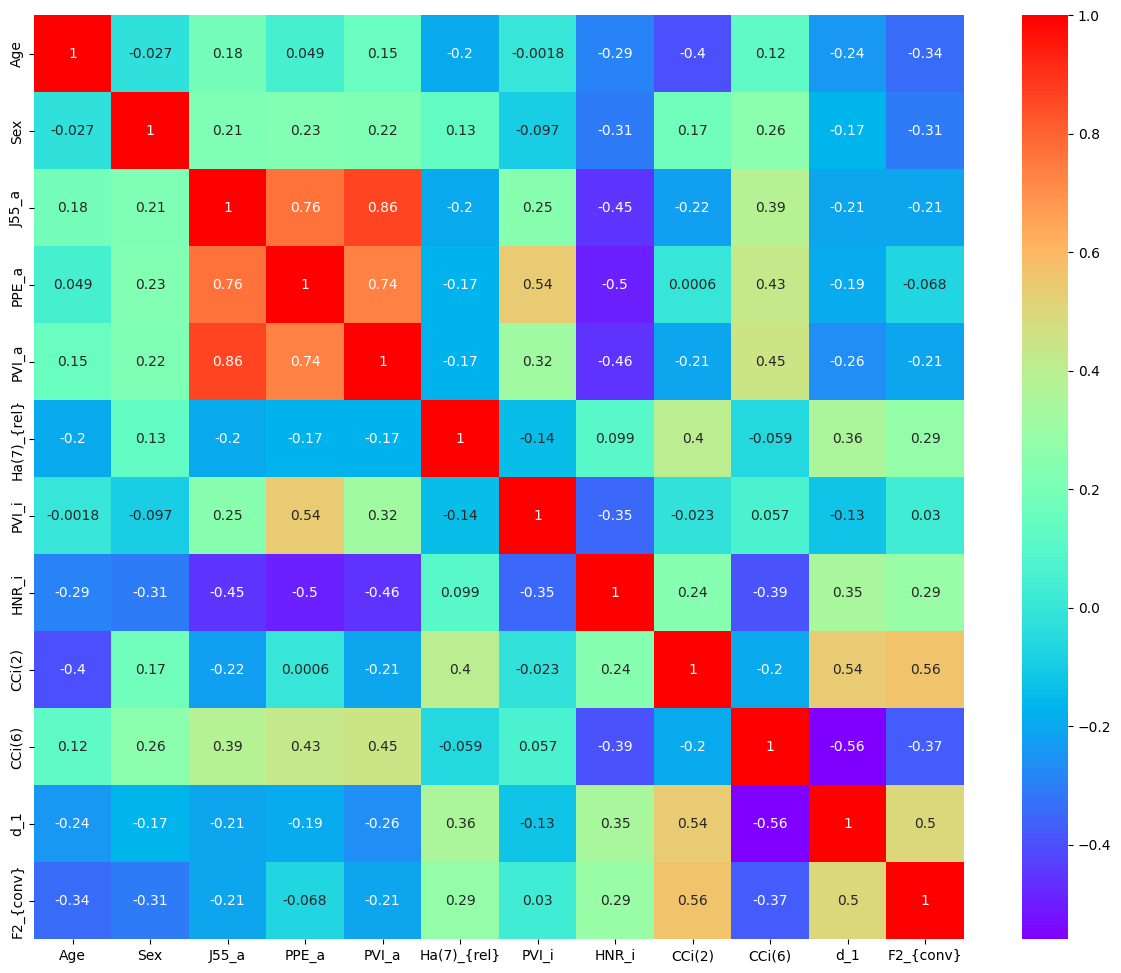

In [25]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap="rainbow")

plt.show()

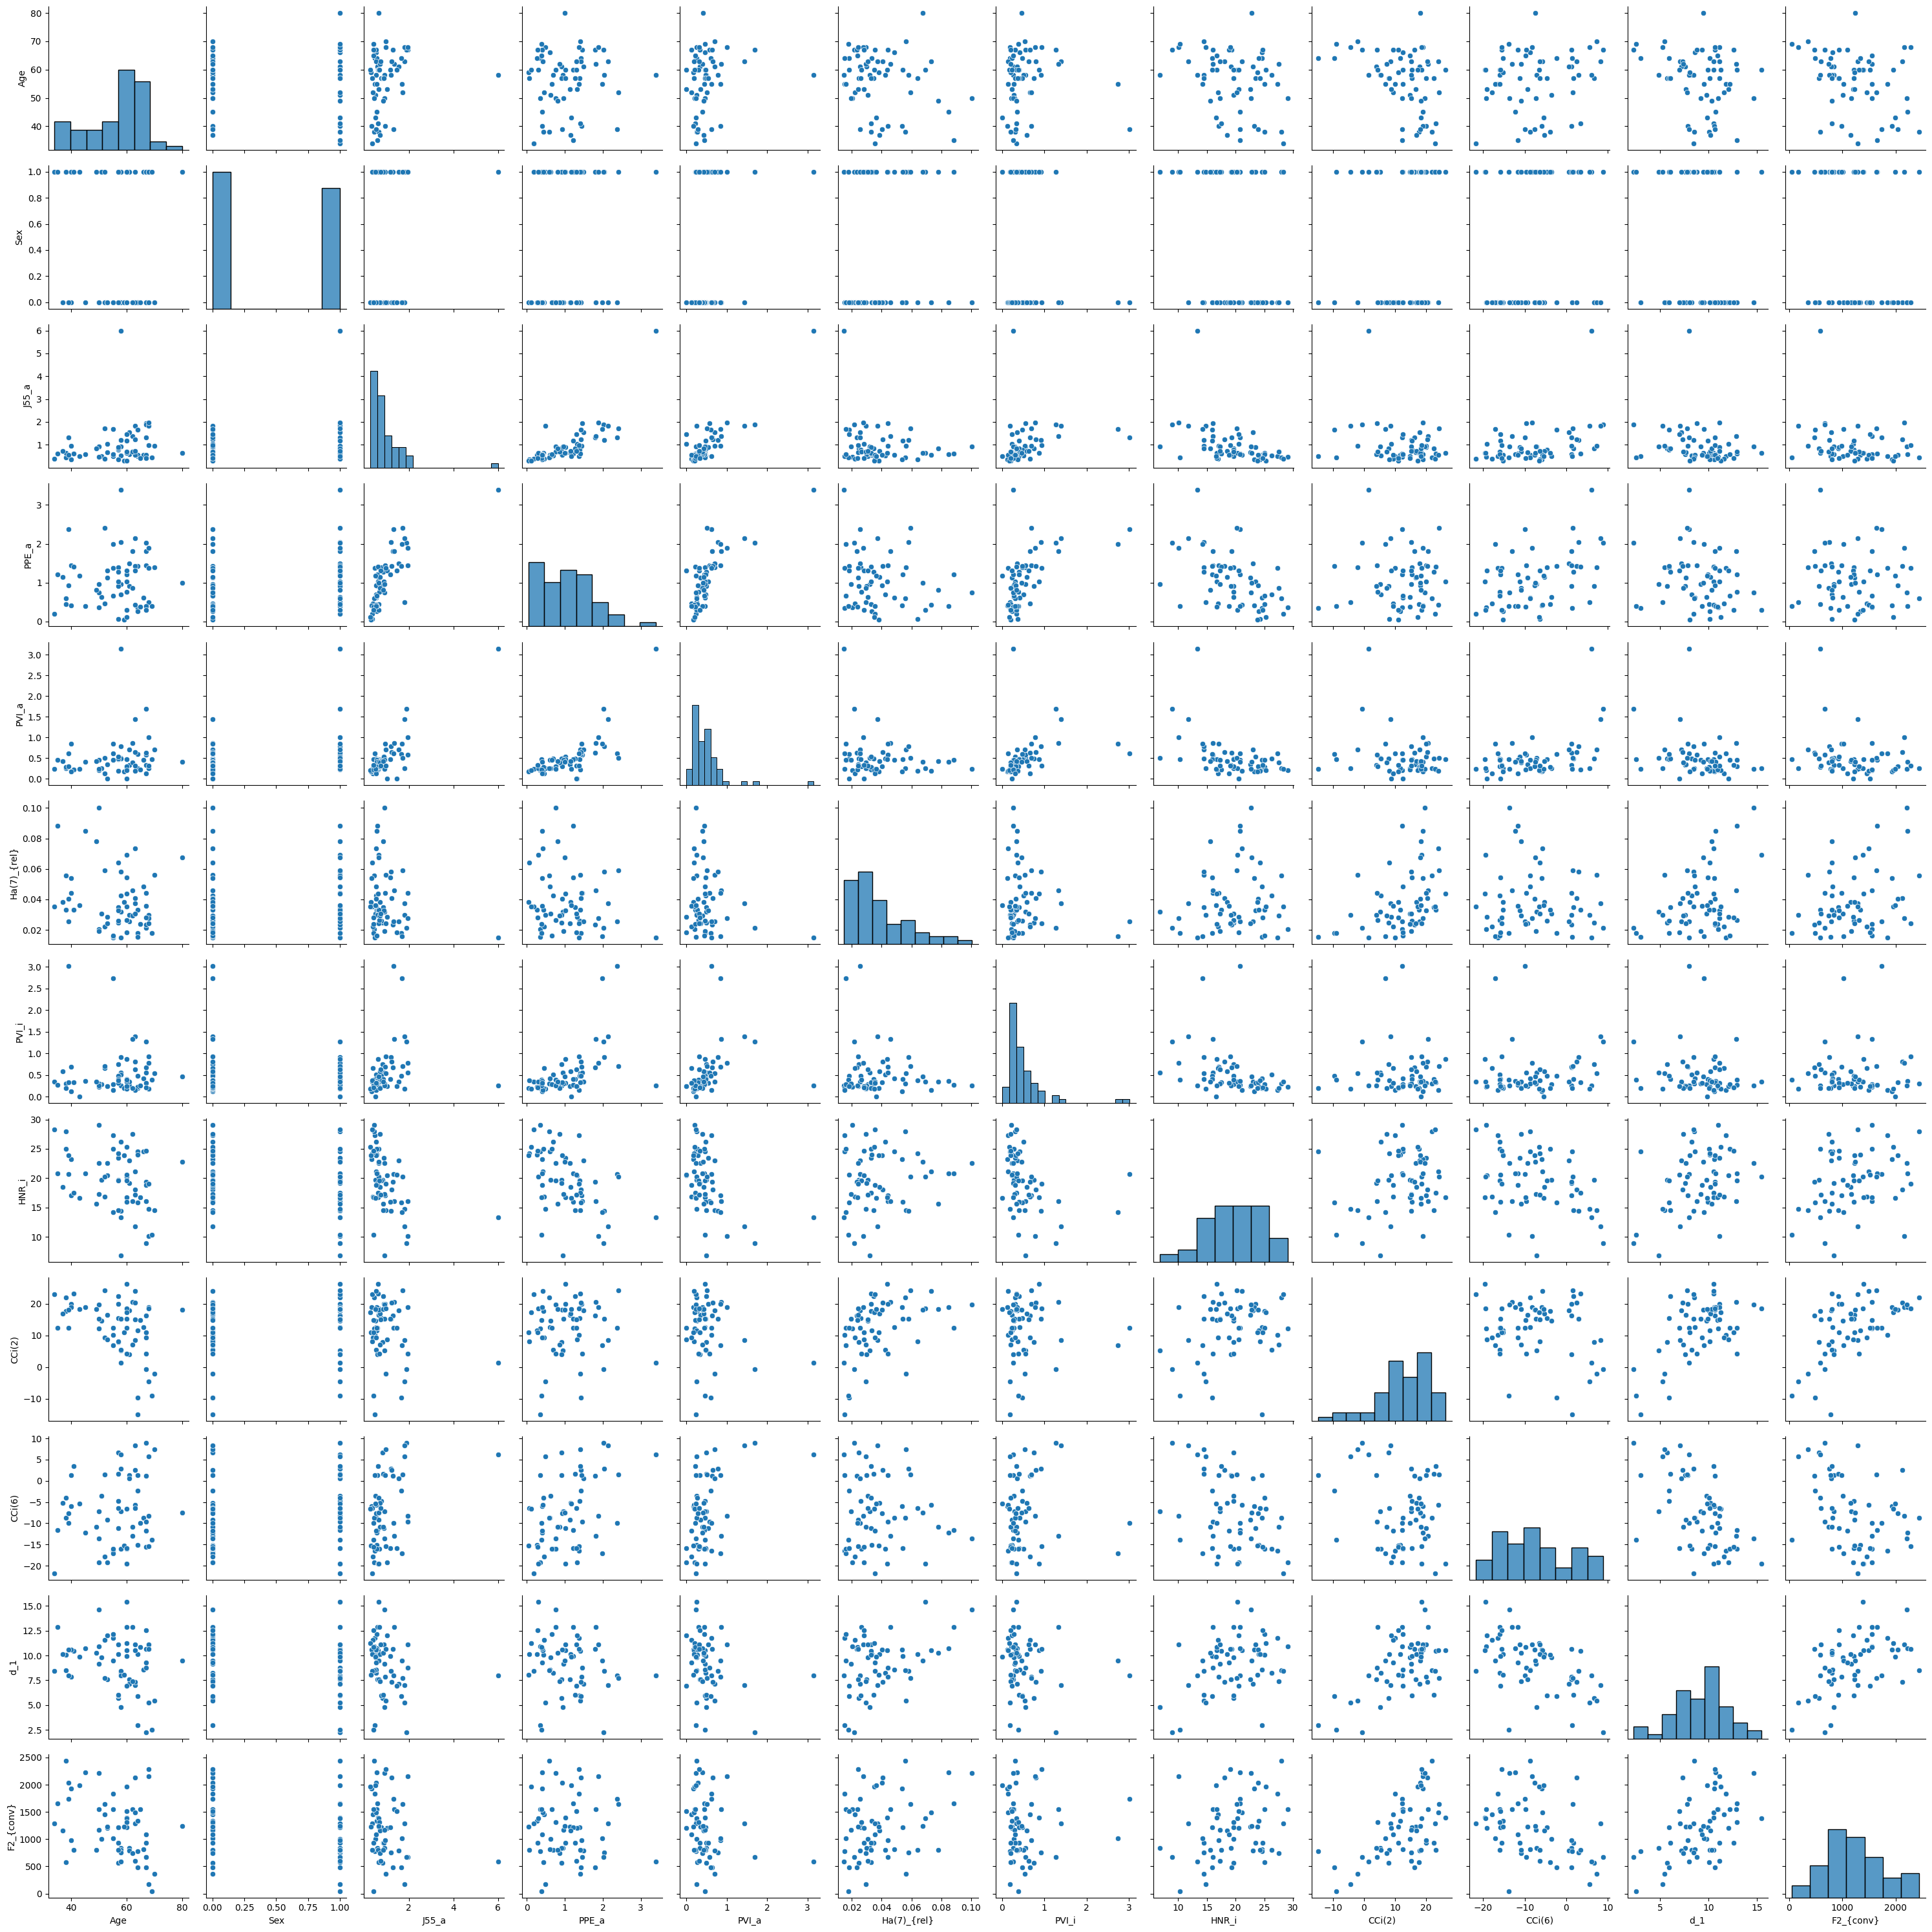

In [26]:

sns.pairplot(data=features)
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=2)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(51, 12)
(51,)
(13, 12)
(13,)


In [31]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [32]:
parameters1={"criterion":("gini","entropy"),"max_depth":[2,4,6,8],"min_samples_split":[2,4,6,8,10],"random_state":[0,10,20,30,40]}

In [33]:
dc=DecisionTreeClassifier()

In [34]:
grid1=GridSearchCV(estimator=dc,cv=5,param_grid=parameters1,n_jobs=-1)

In [35]:
grid1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'random_state': [0, 10, 20, 30, 40]})

In [36]:
grid1.best_score_

0.7618181818181817

In [37]:
grid1.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_split': 2,
 'random_state': 0}

In [38]:
parameters2={"n_estimators":[10,20,30,40,50],"criterion":("gini","entropy"),"max_depth":[2,4,6,8,10],"min_samples_split":[2,4,6,8,10],"max_features":("sqrt","auto","log2"),"random_state":[0,10,20,30,40,50]}

In [39]:
rc=RandomForestClassifier()

In [40]:
grid2=GridSearchCV(estimator=rc,param_grid=parameters2,cv=5,n_jobs=-1)

In [41]:
 grid2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ('sqrt', 'auto', 'log2'),
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'random_state': [0, 10, 20, 30, 40, 50]})

In [42]:
grid2.best_score_

0.8818181818181818

In [43]:
grid2.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 30,
 'random_state': 0}

In [44]:
parameters3={"solver":("liblinear","lbsgf","newton_cg"),"C":[0.1,1.0,2.0,10]}

In [45]:
le=LogisticRegression()

In [46]:
grid3=GridSearchCV(estimator=le,param_grid=parameters3,cv=8,n_jobs=-1)

In [47]:
grid3.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 2.0, 10],
                         'solver': ('liblinear', 'lbsgf', 'newton_cg')})

In [48]:
grid3.best_score_

0.7886904761904763

In [49]:
grid3.best_params_

{'C': 2.0, 'solver': 'liblinear'}

In [50]:
parameters4={"var_smoothing":[1e-9,1e-10,1e-8]}

In [51]:
nb=GaussianNB()

In [52]:
grid4=GridSearchCV(estimator=nb,param_grid=parameters4,cv=5,n_jobs=-1)

In [53]:
grid4.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-10, 1e-08]})

In [54]:
grid4.best_score_

0.8018181818181818

In [55]:
grid4.best_params_

{'var_smoothing': 1e-08}

In [56]:
parameters5={"n_neighbors":[5,10,15,10,25,30,],"algorithm":("auto","ball_tree","kd_tree"),"p":[1,2]}

In [57]:
kn=KNeighborsClassifier()

In [58]:
grid5=GridSearchCV(estimator=kn,param_grid=parameters5,cv=5,n_jobs=-1)

In [59]:
grid5.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree'),
                         'n_neighbors': [5, 10, 15, 10, 25, 30], 'p': [1, 2]})

In [60]:
grid5.best_score_

0.7272727272727273

In [61]:
grid5.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'p': 1}

In [62]:
parameters6={"kernel":("linear","rbf"),"C":[0.01,0.1,1.0,10],'gamma':("auto","scale")}

In [63]:
svm=SVC()

In [64]:
grid6=GridSearchCV(estimator=svm,param_grid=parameters6,cv=5,n_jobs=-1)

In [65]:
grid6.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'rbf')})

In [66]:
grid6.best_score_

0.7854545454545454

In [67]:
grid6.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}

In [68]:
parameters7={"n_estimators":[10,20,30,40,],"max_samples":[1.0,2.0,3.0,4.0,5.0,6.0],"max_features":[1.0,2.0,3.0,4.0,5.0,6.0,7.0]}

In [69]:
bg=BaggingClassifier()

In [70]:
grid7=GridSearchCV(estimator=bg,param_grid=parameters7,cv=5,n_jobs=-1)

In [71]:
grid7.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],
                         'max_samples': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
                         'n_estimators': [10, 20, 30, 40]})

In [72]:
grid7.best_score_

0.8036363636363635

In [73]:
grid7.best_params_

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 40}

In [74]:
models = {
    "DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=0)": None,
"RandomForestClassifier(criterion='gini', max_depth=8, max_features='sqrt', min_samples_split=4, n_estimators=30)": None,
"BaggingClassifier(max_features=1.0, max_samples=1.0, n_estimators=20)": None,
    "SVC(kernel='linear', gamma='auto', C=10)": None,
    "LogisticRegression(C=2.0, solver='liblinear')": None,
    "KNeighborsClassifier(algorithm='auto', n_neighbors=15, p=1)": None,
    "GaussianNB(var_smoothing=1e-08)": None
}

In [75]:
import warnings
warnings.filterwarnings("ignore")
for i in models:
    estimatore=eval(i)
    sfsp=ShuffleSplit(5)
    score1=cross_val_score(estimator=estimatore,X=features,y=y,cv=sfsp,verbose=0)
    print(i)
    print(score1)
    print("mean score:", score1.mean())
    print("minimun scre:",score1.min())
    print("maximun score:",score1.max())
    print("---"*10)

DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=0)
[0.429 0.857 0.714 0.429 0.857]
mean score: 0.6571428571428571
minimun scre: 0.42857142857142855
maximun score: 0.8571428571428571
------------------------------
RandomForestClassifier(criterion='gini', max_depth=8, max_features='sqrt', min_samples_split=4, n_estimators=30)
[0.714 0.857 0.714 0.714 0.857]
mean score: 0.7714285714285715
minimun scre: 0.7142857142857143
maximun score: 0.8571428571428571
------------------------------
BaggingClassifier(max_features=1.0, max_samples=1.0, n_estimators=20)
[0.714 0.857 1.    0.857 0.857]
mean score: 0.8571428571428571
minimun scre: 0.7142857142857143
maximun score: 1.0
------------------------------
SVC(kernel='linear', gamma='auto', C=10)
[0.714 1.    0.857 0.571 0.714]
mean score: 0.7714285714285716
minimun scre: 0.5714285714285714
maximun score: 1.0
------------------------------
LogisticRegression(C=2.0, solver='liblinear')
[0.857 0.714 0.714 1.  

In [76]:
for i in models:
    estimator=eval(i)
    Kfold=KFold(5)
    score1=cross_val_score(estimator=estimator,X=features,y=y,cv=Kfold,verbose=0)
    print(i)
    print("Mean score:",score1.mean())
    print("Score:",score1)
    print("Minimum score:",score1.min())
    print("Maximum score:",score1.max())
    print("---" *15)

DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=0)
Mean score: 0.717948717948718
Score: [0.615 0.846 0.692 0.769 0.667]
Minimum score: 0.6153846153846154
Maximum score: 0.8461538461538461
---------------------------------------------
RandomForestClassifier(criterion='gini', max_depth=8, max_features='sqrt', min_samples_split=4, n_estimators=30)
Mean score: 0.6564102564102563
Score: [0.538 0.538 0.846 0.692 0.667]
Minimum score: 0.5384615384615384
Maximum score: 0.8461538461538461
---------------------------------------------
BaggingClassifier(max_features=1.0, max_samples=1.0, n_estimators=20)
Mean score: 0.7038461538461538
Score: [0.538 0.846 0.769 0.615 0.75 ]
Minimum score: 0.5384615384615384
Maximum score: 0.8461538461538461
---------------------------------------------
SVC(kernel='linear', gamma='auto', C=10)
Mean score: 0.735897435897436
Score: [0.615 0.615 0.846 0.769 0.833]
Minimum score: 0.6153846153846154
Maximum score: 0.8461538461538

In [77]:
from sklearn.model_selection import StratifiedKFold

In [78]:
for i in models:
    estimator=eval(i)
    st=StratifiedKFold(5)
    score=cross_val_score(estimator=estimator,X=features,y=y,cv=st,verbose=0)
    print(i)
    print("score:",score)
    print("Mean score:",score.mean())
    print("Minimum score:",score.min())
    print("Maximum Score:",score.max())
    print("---"*20)

DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=0)
score: [0.538 0.692 0.846 1.    0.667]
Mean score: 0.7487179487179487
Minimum score: 0.5384615384615384
Maximum Score: 1.0
------------------------------------------------------------
RandomForestClassifier(criterion='gini', max_depth=8, max_features='sqrt', min_samples_split=4, n_estimators=30)
score: [0.769 0.692 0.923 0.923 0.75 ]
Mean score: 0.8115384615384617
Minimum score: 0.6923076923076923
Maximum Score: 0.9230769230769231
------------------------------------------------------------
BaggingClassifier(max_features=1.0, max_samples=1.0, n_estimators=20)
score: [0.692 0.769 0.923 0.923 0.75 ]
Mean score: 0.8115384615384617
Minimum score: 0.6923076923076923
Maximum Score: 0.9230769230769231
------------------------------------------------------------
SVC(kernel='linear', gamma='auto', C=10)
score: [0.846 0.538 0.615 0.769 0.833]
Mean score: 0.7205128205128205
Minimum score: 0.538461538461538

In [79]:
from sklearn.model_selection import LeaveOneOut

In [80]:
for i in models:
    estimator=eval(i)
    le=LeaveOneOut()
    score=cross_val_score(estimator=estimator,cv=le,X=features,y=y,verbose=0)
    print(i)
    print("Scores:",score)
    print("Mean score:",score.mean())
    print("Minimum score:",score.min())
    print("Maximum score:",score.max())
    print("----"*15)

DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=0)
Scores: [1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
Mean score: 0.734375
Minimum score: 0.0
Maximum score: 1.0
------------------------------------------------------------
RandomForestClassifier(criterion='gini', max_depth=8, max_features='sqrt', min_samples_split=4, n_estimators=30)
Scores: [1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 0.8125
Minimum score: 0.0
Maximum score: 1.0
------------------------------------------------------------
BaggingClassifier(max_features=1.0, max_samples=1.0, n_estimators=20)
Scores: [1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [91]:
rc=RandomForestClassifier(criterion= "gini",max_depth= 2,min_samples_split= 2,random_state= 0)

In [92]:
rc.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [93]:
pred=rc.predict(x_test)

In [94]:
accuracy_score(y_test,pred)

0.9230769230769231